<a href="https://colab.research.google.com/github/manoj1995madushanka/couseraTensorflow/blob/master/imageFilter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

let's explore how convolutions work bycreatingbasicconvolution ona 2D grey scale image. first we canload theimage by takingthe 'ascent' image from scipy.  Is is a nice, built in picture with lots of angles and lines

In [0]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

In [3]:
print(i)

[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]


next we can use pyplot library to draw the image 

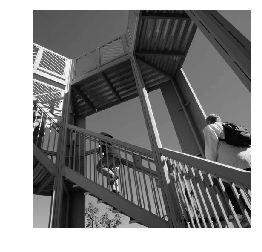

In [4]:
import matplotlib.pyplot as plt
plt.grid(False)
#plt.grid(True)
plt.gray()
#plt.axis('on')
plt.axis('off')
plt.imshow(i)
#plt.show()

the image is stored asanumpy array,so we can create the transformed image by just copying that array.let's also get the dimensions of the image so we can loop over it later

In [5]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
print(size_x)
print(size_y)

512
512


now we can create a filter as a 3*3 array

In [0]:
#this filter detects edges nicely
#it creates a convolution thatonly passes through sharp edges and straight lines
filter = [[-1,-2,-1],[0,0,0],[1,2,1]]
#filter = [[0,1,0],[1,-4,1],[0,1,0]]
#filter = [[-1,0,1],[-2,0,2],[-1,0,1]]
#gaussianFilter= [[1,2,1],[2,4,2],[1,2,1]]
#sharpenFilter = [[0,-1,0],[-1,5,-1],[0,-1,0]]
weight = 1
#gaussianWeight = 1/9
#sharpenWeight = 1
# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them

now create a convolution. we will iterate over the image,leaving a 1 pixel margin, and multiply outeach neighbors of the current pixel by the value defined in the filter.

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image.

In [0]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
    convolution = 0.0
    convolution = convolution + (i[x -1,y-1]*filter[0][0])
    convolution = convolution + (i[x ,y-1]*filter[0][1])
    convolution = convolution + (i[x +1,y-1]*filter[0][2])
    convolution = convolution + (i[x -1,y]*filter[1][0])
    convolution = convolution + (i[x,y]*filter[1][1])
    convolution = convolution + (i[x +1,y]*filter[1][2])
    convolution = convolution + (i[x -1,y+1]*filter[2][0])
    convolution = convolution + (i[x ,y+1]*filter[2][1])
    convolution = convolution + (i[x +1,y+1]*filter[2][2])
    convolution = convolution*weight
    if(convolution<0):
      convolution = 0
    if(convolution>255):
      convolution = 255
    i_transformed[x,y] = convolution

now we can plot the image to see the effect of the convolution

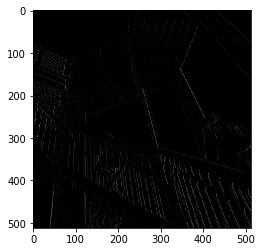

In [24]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()

this code will show a (2,2) pooling. The idea here is to the right,beneath,and right-beneath.take the largest of them and load it into the new image.thus the new image will be 1/4 the size of the old with the dimensions on x and y being halved by this process.you will see that the features get maintained despite this compression

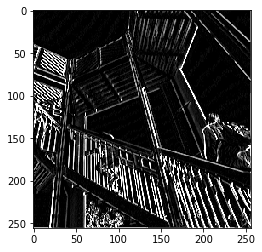

In [18]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x,new_y))
for x in range (0,size_x,2):
  for y in range(0,size_y,2):
    pixels = []
    pixels.append(i_transformed[x,y])
    pixels.append(i_transformed[x+1,y])
    pixels.append(i_transformed[x,y+1])
    pixels.append(i_transformed[x+1,y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

#plot the image 
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()
